In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
df = pd.read_csv(r'/Users/nithyasanthoshini/Downloads/diamonds.csv')

In [38]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [39]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


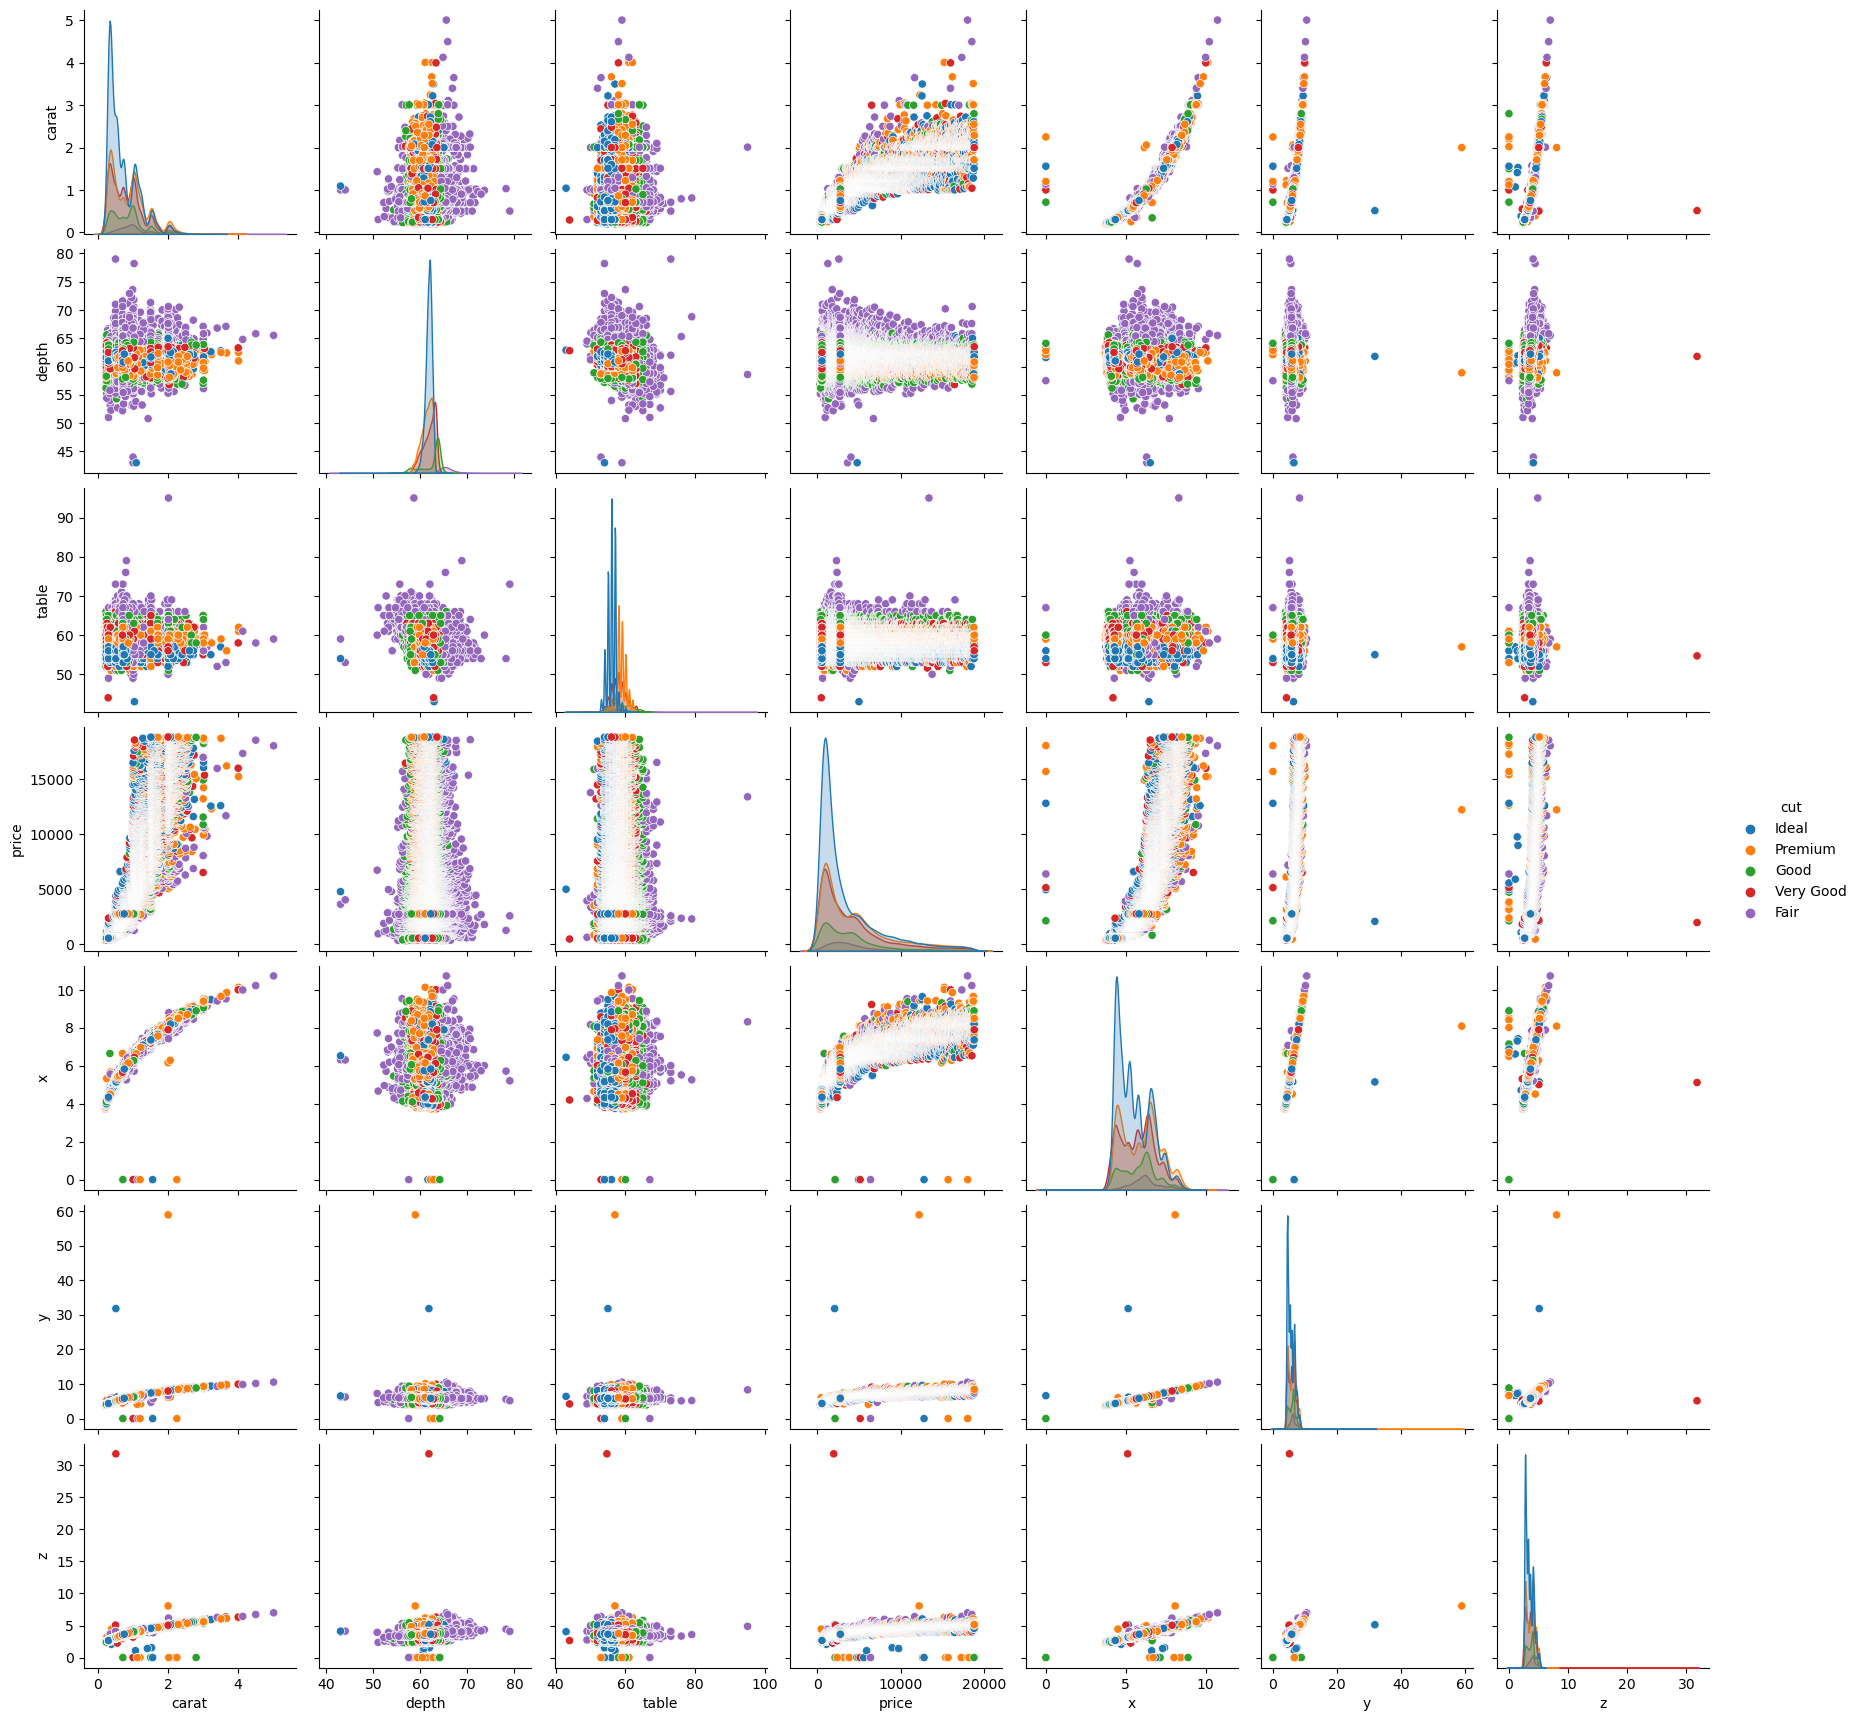

In [5]:
sns.pairplot(df,hue='cut')

In [40]:
df.shape

(53940, 10)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<Axes: title={'center': 'Clarity'}, xlabel='clarity', ylabel='count'>

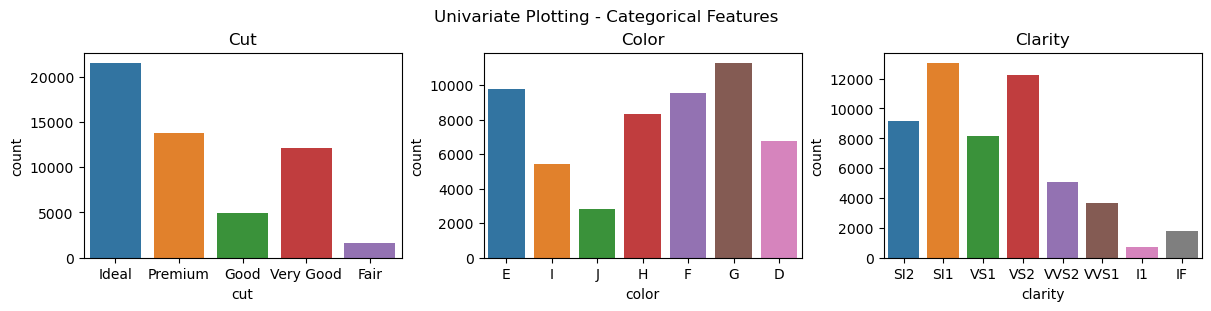

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("Cut")
sns.countplot(data=df,x='cut',ax=axs[0])

axs[1].set_title("Color")
sns.countplot(data=df,x='color',ax=axs[1])

axs[2].set_title("Clarity")
sns.countplot(data=df,x='clarity',ax=axs[2])

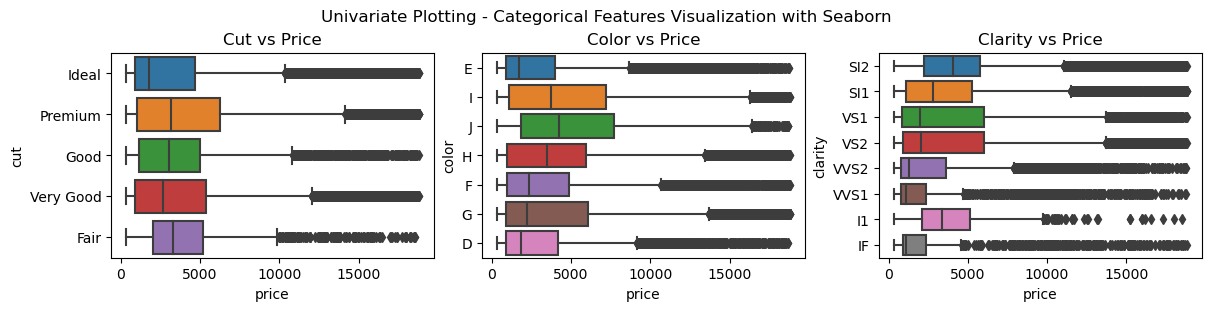

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features Visualization with Seaborn")

axs[0].set_title("Cut vs Price")
sns.boxplot(data=df,x='price',y='cut',ax=axs[0])

axs[1].set_title("Color vs Price")
sns.boxplot(data=df,x='price',y='color',ax=axs[1])

axs[2].set_title("Clarity vs Price")
sns.boxplot(data=df,x='price',y='clarity',ax=axs[2])

plt.show()

<Axes: title={'center': 'Table'}, xlabel='table', ylabel='Count'>

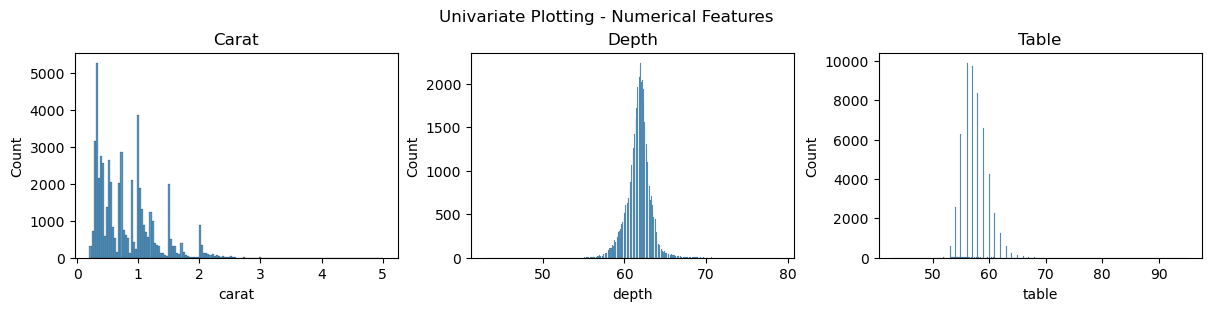

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("Carat")
sns.histplot(data=df,x='carat',ax=axs[0])

axs[1].set_title("Depth")
sns.histplot(data=df,x='depth',ax=axs[1])

axs[2].set_title("Table")
sns.histplot(data=df,x='table',ax=axs[2])

/Users/nithyasanthoshini/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


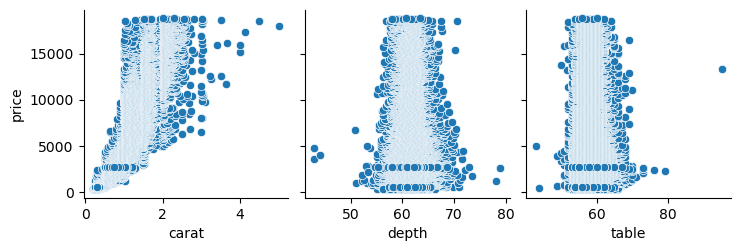

In [45]:
sns.pairplot(data=df,
            x_vars=['carat','depth','table'],
            y_vars='price')

In [46]:
y = df.pop('price')
x = df

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=44)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(40455, 9) (40455,)
(13485, 9) (13485,)


In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=44)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(43152, 9) (43152,)
(10788, 9) (10788,)


In [108]:
x_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [109]:
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_num = x_train.select_dtypes(include=['float64'])

In [110]:
 x_train_cat.head()

,cut,color,clarity
49654,Very Good,H,SI2
20818,Very Good,H,VS1
39091,Ideal,E,VVS1
3990,Ideal,H,SI1
36336,Ideal,G,VVS2


In [111]:
 x_train_num.head()

,carat,depth,table,x,y,z
49654,0.71,61.8,58.0,5.67,5.73,3.52
20818,1.37,62.0,59.0,7.08,7.12,4.40
39091,0.32,61.6,56.0,4.43,4.37,2.71
3990,0.81,61.9,56.0,5.92,5.97,3.68
36336,0.32,62.6,57.0,4.38,4.34,2.73


In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_num_transformed = pd.DataFrame(scaler.fit_transform(x_train_num),
                                   columns = scaler.get_feature_names_out(),
                                   index = x_train_num.index)

x_train_num_transformed.head()

,carat,depth,table,x,y,z
49654,-0.188228,0.031910,0.245654,-0.057428,-0.007196,-0.029720
20818,1.203628,0.171076,0.692328,1.199636,1.202439,1.211888
39091,-1.010689,-0.107256,-0.647693,-1.162931,-1.190723,-1.172563
3990,0.022659,0.101493,-0.647693,0.165456,0.201662,0.196027
36336,-1.010689,0.588573,-0.201020,-1.207507,-1.216831,-1.144345


In [140]:
print(df['carat'].mean())
print(df['depth'].std())
print(df['table'].median())
print(df['depth'].min())
print(df['carat'].std())
#print(df['price'].median())
#print(df['price'].mean())

0.7979397478680014
1.4326213188337733
57.0
43.0
0.47401124440538067


In [141]:
print(x_train_num_transformed['carat'].mean())
print(x_train_num_transformed['depth'].std())
print(x_train_num_transformed['table'].median())
print(x_train_num_transformed['carat'].std())

-1.4490118823435486e-17
1.0000115871498492
-0.20101969641731401
1.000011587149895


In [113]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)
x_train_cat_transformed = pd.DataFrame(encoder_.fit_transform(x_train_cat),
                                   columns = encoder_.get_feature_names_out(),
                                   index = x_train_cat.index)

print("Shape of Data before Transformation: ", x_train_cat.shape)
print("Shape of Data after Transformation: ",x_train_cat_transformed.shape)

x_train_cat_transformed.head()

Shape of Data before Transformation:  (43152, 3)
Shape of Data after Transformation:  (43152, 20)


,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
49654,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20818,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39091,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3990,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36336,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [114]:
print('Applied encoding on: ',encoder_.feature_names_in_)
print('Unique categories: ', encoder_.categories_)
print("Feature Names after Encoding: ",encoder_.get_feature_names_out())

Applied encoding on:  ['cut' 'color' 'clarity']
Unique categories:  [array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
Feature Names after Encoding:  ['cut_Fair' 'cut_Good' 'cut_Ideal' 'cut_Premium' 'cut_Very Good' 'color_D'
 'color_E' 'color_F' 'color_G' 'color_H' 'color_I' 'color_J' 'clarity_I1'
 'clarity_IF' 'clarity_SI1' 'clarity_SI2' 'clarity_VS1' 'clarity_VS2'
 'clarity_VVS1' 'clarity_VVS2']


In [115]:
cut_encoder={'Fair':1,'Good':2,'Very Good':3,'Ideal':4,'Premium':5}
color_encoder = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
clarity_encoder = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [116]:
x_train_cat_transformed['cut'] = x_train_cat['cut'].map(cut_encoder)
x_train_cat_transformed['color'] = x_train_cat['color'].map(color_encoder)
x_train_cat_transformed['clarity'] = x_train_cat['clarity'].map(clarity_encoder)

In [117]:
x_train_cat_transformed.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut,color,clarity
49654,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,3,2
20818,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,3,5
39091,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,6,7
3990,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,3,3
36336,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,4,6


In [118]:
x_train_cat_transformed = pd.DataFrame(index=x_train_cat.index)

x_train_cat_transformed.head()

""
49654
20818
39091
3990
36336


In [119]:
x_train_cat_transformed['cut'] = x_train_cat['cut'].map(cut_encoder)
x_train_cat_transformed['color'] = x_train_cat['color'].map(color_encoder)
x_train_cat_transformed['clarity'] = x_train_cat['clarity'].map(clarity_encoder)

In [120]:
x_train_cat_transformed.head()

,cut,color,clarity
49654,3,3,2
20818,3,3,5
39091,4,6,7
3990,4,3,3
36336,4,4,6


In [121]:
x_train_transformed = pd.concat([x_train_num_transformed,x_train_cat_transformed],axis=1)

x_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
49654,-0.188228,0.031910,0.245654,-0.057428,-0.007196,-0.029720,3,3,2
20818,1.203628,0.171076,0.692328,1.199636,1.202439,1.211888,3,3,5
39091,-1.010689,-0.107256,-0.647693,-1.162931,-1.190723,-1.172563,4,6,7
3990,0.022659,0.101493,-0.647693,0.165456,0.201662,0.196027,4,3,3
36336,-1.010689,0.588573,-0.201020,-1.207507,-1.216831,-1.144345,4,4,6


In [122]:
x_train_transformed.isnull().any()

carat      False
depth      False
table      False
x          False
y          False
z          False
cut        False
color      False
clarity    False
dtype: bool

In [123]:
x_test_cat = x_test.select_dtypes(include=['object'])
x_test_num = x_test.select_dtypes(include=['int64', 'float64'])

In [124]:
x_test_num_transformed = pd.DataFrame(scaler.transform(x_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = x_test_num.index)

x_test_num_transformed.head()

,carat,depth,table,x,y,z
40423,-0.209317,1.423567,1.139001,-0.084174,-0.250863,-0.001501
16309,0.655321,-0.455170,0.692328,0.825192,0.776021,0.732176
3260,0.275724,1.841064,-0.201020,0.361594,0.306091,0.562866
36811,-1.052867,0.797321,0.245654,-1.323407,-1.329962,-1.243109
48721,-0.588915,-0.663919,-0.201020,-0.467534,-0.503233,-0.551759


In [125]:
x_test_cat_transformed = pd.DataFrame(index = x_test_cat.index)

x_test_cat_transformed['cut'] = x_test_cat['cut'].map(cut_encoder)
x_test_cat_transformed['color'] = x_test_cat['color'].map(color_encoder)
x_test_cat_transformed['clarity'] = x_test_cat['clarity'].map(clarity_encoder)

x_test_cat_transformed.head()

,cut,color,clarity
40423,2,5,1
16309,5,3,4
3260,1,4,3
36811,5,4,8
48721,4,4,6


In [126]:
x_test_transformed = pd.concat([x_test_num_transformed, x_test_cat_transformed], axis=1)

x_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
40423,-0.209317,1.423567,1.139001,-0.084174,-0.250863,-0.001501,2,5,1
16309,0.655321,-0.455170,0.692328,0.825192,0.776021,0.732176,5,3,4
3260,0.275724,1.841064,-0.201020,0.361594,0.306091,0.562866,1,4,3
36811,-1.052867,0.797321,0.245654,-1.323407,-1.329962,-1.243109,5,4,8
48721,-0.588915,-0.663919,-0.201020,-0.467534,-0.503233,-0.551759,4,4,6


In [130]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(x_train_transformed,y_train)

y_test_pred = regressor.predict(x_test_transformed)

print("80-20 split: ",metrics.mean_absolute_error(y_test,y_test_pred))

80-20 split:  816.392290341779


In [142]:
output_df = pd.DataFrame({'Actual':y_test})
output_df['Linear Regression Prediction'] = y_test_pred

output_df

,Actual,Linear Regression Prediction
40423,1134,1046.71
16309,6527,5556.94
3260,3358,3532.38
36811,956,927.55
48721,2012,1894.64
...,...,...
2163,3130,2665.34
50161,2218,2093.84
31047,750,859.02
9098,4525,4236.92


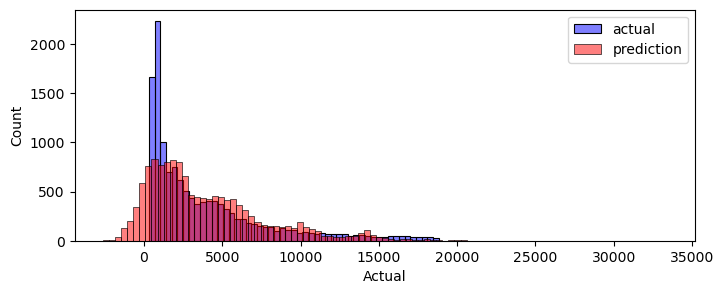

In [92]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['Linear Regression Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor=KNeighborsRegressor()
regressor.fit(x_train_transformed,y_train)

y_test_pred = regressor.predict(x_test_transformed)

metrics.mean_absolute_error(y_test,y_test_pred)

383.9085799035966

In [132]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor=KNeighborsRegressor()
regressor.fit(x_train_transformed,y_train)

y_test_pred = regressor.predict(x_test_transformed)

print("80-20 split: ",metrics.mean_absolute_error(y_test,y_test_pred))

80-20 split:  378.9879310344828


In [95]:
output_df['KNN Regression Prediction'] = y_test_pred

output_df

,Actual,Linear Regression Prediction,KNN Regression Prediction
40423,1134,1092.983013,1154.6
16309,6527,6117.491483,5410.0
3260,3358,3818.085067,3923.0
36811,956,1722.868852,1040.2
48721,2012,2376.948926,2056.4
...,...,...,...
12192,5188,5134.643897,4953.8
4739,573,-3.777108,666.2
20890,9111,8218.363923,8772.6
39675,1087,591.570289,939.0


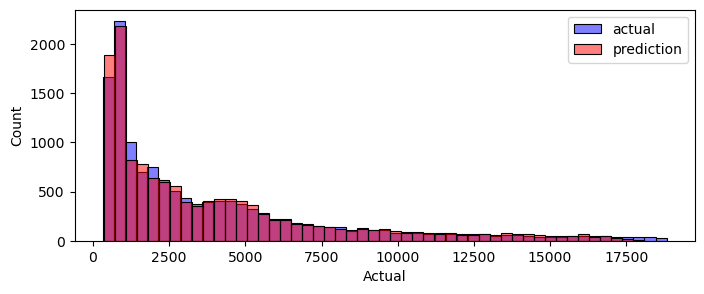

In [96]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['KNN Regression Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(x_train_transformed,y_train)

y_test_pred = regressor.predict(x_test_transformed)

metrics.mean_absolute_error(y_test,y_test_pred)

360.3041527623285

In [133]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(x_train_transformed,y_train)

y_test_pred = regressor.predict(x_test_transformed)

print("80-20 split: ",metrics.mean_absolute_error(y_test,y_test_pred))

80-20 split:  352.9133914225682


In [99]:
output_df['DT Regression Prediction'] = y_test_pred

output_df

,Actual,Linear Regression Prediction,KNN Regression Prediction,DT Regression Prediction
40423,1134,1092.983013,1154.6,945.0
16309,6527,6117.491483,5410.0,5395.0
3260,3358,3818.085067,3923.0,3286.0
36811,956,1722.868852,1040.2,780.0
48721,2012,2376.948926,2056.4,1813.0
...,...,...,...,...
12192,5188,5134.643897,4953.8,4871.0
4739,573,-3.777108,666.2,605.0
20890,9111,8218.363923,8772.6,9215.0
39675,1087,591.570289,939.0,1061.0


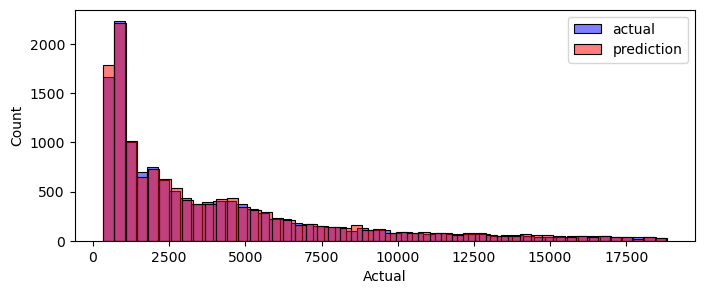

In [100]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['DT Regression Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(x_train_transformed,y_train)

y_test_pred = regressor.predict(x_test_transformed)

metrics.mean_absolute_error(y_test,y_test_pred)

269.66090698983584

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(x_train_transformed,y_train)

y_test_pred = regressor.predict(x_test_transformed)

print("80-20 split: ",metrics.mean_absolute_error(y_test,y_test_pred))

80-20 split:  267.5242229240602


In [104]:
output_df['RandomForest Regression Prediction'] = y_test_pred

output_df

,Actual,Linear Regression Prediction,KNN Regression Prediction,DT Regression Prediction,RandomForest Regression Prediction
40423,1134,1092.983013,1154.6,945.0,1060.25
16309,6527,6117.491483,5410.0,5395.0,5471.86
3260,3358,3818.085067,3923.0,3286.0,3381.50
36811,956,1722.868852,1040.2,780.0,929.14
48721,2012,2376.948926,2056.4,1813.0,1888.35
...,...,...,...,...,...
12192,5188,5134.643897,4953.8,4871.0,5118.20
4739,573,-3.777108,666.2,605.0,603.14
20890,9111,8218.363923,8772.6,9215.0,9069.51
39675,1087,591.570289,939.0,1061.0,1040.71


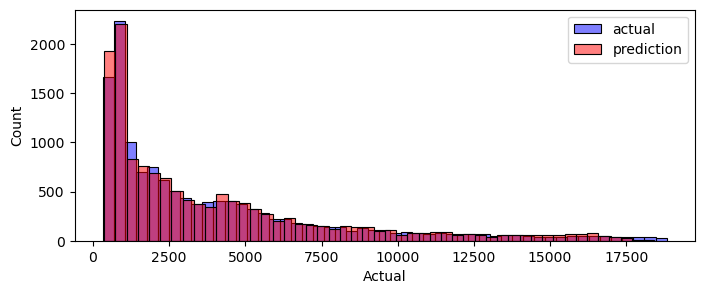

In [105]:
fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'],color='blue',alpha=0.5, label='actual')
sns.histplot(output_df['RandomForest Regression Prediction'],color='red',alpha=0.5,label='prediction')

plt.legend()